In [119]:
try:
    from lerobot.datasets.lerobot_dataset import LeRobotDataset
    _LEROBOT_VERSION = '2.1'
except:
    from lerobot.common.datasets.lerobot_dataset import LeRobotDataset
    _LEROBOT_VERSION = '2.0'

repo_id = 'Koorye/pika'
# repo_id = 'Koorye/pika-tiny'

if _LEROBOT_VERSION == '2.1':
    dataset = LeRobotDataset(repo_id=repo_id, video_backend='pyav')
else:
    dataset = LeRobotDataset(repo_id=repo_id, local_files_only=True)

iterator = iter(dataset)

In [151]:
import cv2
import numpy as np
from PIL import Image


def get_next_sample(iterator, k):
    sample = next(iterator)
    for _ in range(k - 1):
        sample = next(iterator)
    return sample

iterator = iter(dataset)
sample0 = get_next_sample(iterator, 0)
sample = get_next_sample(iterator, 50)

print(sample['actions'] - sample0['actions'])

print(sample.keys())
print(sample['episode_index'])
print(sample['frame_index'])
print(sample['actions'] * 1000)
print(sample['left_wrist_fisheye_rgb'].shape)
Image.fromarray(cv2.hconcat([
    np.uint8(sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255), 
    np.uint8(sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
]))

tensor([ 0.0860, -0.0520,  0.0949,  0.0697, -0.1756, -0.2436,  0.0000, -0.1144,
        -0.0105,  0.0111,  0.6599,  0.0851,  0.6691, -1.2200])
dict_keys(['third_base_rgb', 'left_wrist_base_rgb', 'left_wrist_fisheye_rgb', 'right_wrist_base_rgb', 'right_wrist_fisheye_rgb', 'states', 'actions', 'third_base_depth', 'left_wrist_base_depth', 'right_wrist_base_depth', 'timestamp', 'frame_index', 'episode_index', 'index', 'task_index', 'task'])
tensor(0)
tensor(50)
tensor([ 4.8973e+01, -1.4960e+00, -8.5422e+01,  8.9223e+01,  7.1756e+02,
         1.4284e+03,  1.6900e+03,  5.9722e+02,  1.8534e+02, -1.6595e+02,
         6.4594e+02,  9.8004e+02,  2.3082e+03,  4.6000e+02])
torch.Size([3, 480, 640])


In [19]:
from tqdm import tqdm

iterator = iter(dataset)

left_xmin, left_xmax = 1e8, -1e8
left_ymin, left_ymax = 1e8, -1e8
left_zmin, left_zmax = 1e8, -1e8
right_xmin, right_xmax = 1e8, -1e8
right_ymin, right_ymax = 1e8, -1e8
right_zmin, right_zmax = 1e8, -1e8
left_xmin_sample, left_xmax_sample = None, None
left_ymin_sample, left_ymax_sample = None, None
left_zmin_sample, left_zmax_sample = None, None
right_xmin_sample, right_xmax_sample = None, None
right_ymin_sample, right_ymax_sample = None, None
right_zmin_sample, right_zmax_sample = None, None

for i in tqdm(range(300)):
    sample = next(iterator)
    if sample['actions'][3] < left_xmin:
        left_xmin = sample['actions'][3]
        left_xmin_sample = sample
    if sample['actions'][3] > left_xmax:
        left_xmax = sample['actions'][3]
        left_xmax_sample = sample
    if sample['actions'][4] < left_ymin:
        left_ymin = sample['actions'][4]
        left_ymin_sample = sample
    if sample['actions'][4] > left_ymax:
        left_ymax = sample['actions'][4]
        left_ymax_sample = sample
    if sample['actions'][5] < left_zmin:
        left_zmin = sample['actions'][5]
        left_zmin_sample = sample
    if sample['actions'][5] > left_zmax:
        left_zmax = sample['actions'][5]
        left_zmax_sample = sample
    if sample['actions'][10] < right_xmin:
        right_xmin = sample['actions'][10]
        right_xmin_sample = sample
    if sample['actions'][10] > right_xmax:
        right_xmax = sample['actions'][10]
        right_xmax_sample = sample
    if sample['actions'][11] < right_ymin:
        right_ymin = sample['actions'][11]
        right_ymin_sample = sample
    if sample['actions'][11] > right_ymax:
        right_ymax = sample['actions'][11]
        right_ymax_sample = sample
    if sample['actions'][12] < right_zmin:
        right_zmin = sample['actions'][12]
        right_zmin_sample = sample
    if sample['actions'][12] > right_zmax:
        right_zmax = sample['actions'][12]
        right_zmax_sample = sample

100%|██████████| 300/300 [00:26<00:00, 11.51it/s]


In [20]:
print(f'Left xmin: {left_xmin}, xmax: {left_xmax}, ymin: {left_ymin}, ymax: {left_ymax}, zmin: {left_zmin}, zmax: {left_zmax}')
Image.fromarray(cv2.hconcat([
    np.uint8(left_xmin_sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255), 
    np.uint8(left_xmax_sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
    np.uint8(left_ymin_sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
    np.uint8(left_ymax_sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
    np.uint8(left_zmin_sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255), 
    np.uint8(left_zmax_sample['left_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
]))

Left xmin: -0.3861178755760193, xmax: 0.2060430347919464, ymin: 0.6091545820236206, ymax: 0.9866033792495728, zmin: 0.5140209197998047, zmax: 1.6720552444458008


In [21]:
print(f'Right xmin: {right_xmin}, xmax: {right_xmax}, ymin: {right_ymin}, ymax: {right_ymax}, zmin: {right_zmin}, zmax: {right_zmax}')
Image.fromarray(cv2.hconcat([
    np.uint8(right_xmin_sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255), 
    np.uint8(right_xmax_sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
    np.uint8(right_ymin_sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
    np.uint8(right_ymax_sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
    np.uint8(right_zmin_sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255), 
    np.uint8(right_zmax_sample['right_wrist_fisheye_rgb'].permute(1, 2, 0).numpy() * 255),
]))

Right xmin: -0.11083261668682098, xmax: 1.2279517650604248, ymin: 0.5681357979774475, ymax: 1.021193504333496, zmin: 1.6277908086776733, zmax: 3.1234588623046875


真机 X顺时针，Y顺时针，Z顺时针

In [131]:
import math
import numpy as np


def euler_to_rotation_matrix(rx, ry, rz):
    """Convert Euler angles (in radians) to rotation matrix (XYZ order)"""
    # XYZ order: first rx (roll), then ry (pitch), then rz (yaw)
    cx, sx = math.cos(rx), math.sin(rx)
    cy, sy = math.cos(ry), math.sin(ry)
    cz, sz = math.cos(rz), math.sin(rz)
    
    # Rotation matrix for XYZ order
    R = np.array([
        [cy*cz, sx*sy*cz - cx*sz, cx*sy*cz + sx*sz],
        [cy*sz, sx*sy*sz + cx*cz, cx*sy*sz - sx*cz],
        [-sy,   sx*cy,            cx*cy]
    ])
    return R


def rotation_matrix_to_euler(R):
    """Convert rotation matrix to Euler angles (XYZ order)"""
    sy = math.sqrt(R[0, 0]**2 + R[1, 0]**2)
    singular = sy < 1e-6
    
    if not singular:
        rx = math.atan2(R[2, 1], R[2, 2])
        ry = math.atan2(-R[2, 0], sy)
        rz = math.atan2(R[1, 0], R[0, 0])
    else:
        rx = math.atan2(-R[1, 2], R[1, 1])
        ry = math.atan2(-R[2, 0], sy)
        rz = 0
    
    return np.array([rx, ry, rz])


def delta_euler(euler1, euler2):
    R1 = euler_to_rotation_matrix(euler1[0], euler1[1], euler1[2])
    R2 = euler_to_rotation_matrix(euler2[0], euler2[1], euler2[2])
    R_delta = np.dot(R2, R1.T)
    delta_euler_angles = rotation_matrix_to_euler(R_delta)
    return delta_euler_angles


iterator = iter(dataset)
past_sample = next(iterator)
current_episode = past_sample['episode_index'].item()

delta_actions_list = []

while True:
    sample = get_next_sample(iterator, 1)
    if sample['frame_index'].item() > 300:
        break
    
    delta_pos_left = sample['actions'][:3] - past_sample['actions'][:3]
    delta_euler_left = delta_euler(past_sample['actions'][3:6], sample['actions'][3:6])
    delta_action_left = np.array([sample['actions'][6]])

    delta_pos_right = sample['actions'][7:10] - past_sample['actions'][7:10]
    delta_euler_right = delta_euler(past_sample['actions'][10:13], sample['actions'][10:13])
    delta_action_right = np.array([sample['actions'][13]])

    delta_actions = np.concatenate([
        delta_pos_left, delta_euler_left, delta_action_left,
        delta_pos_right, delta_euler_right, delta_action_right
    ]).astype(np.float32)
    print(rad_to_deg(delta_euler_right))
    delta_actions_list.append(delta_actions)
    past_sample = sample

delta_actions_list = np.stack(delta_actions_list)
print(delta_actions_list.shape)
np.save('../examples/example_actions.npy', delta_actions_list)

/home/agilex/miniconda3/envs/pi0-for-pika-wsh/lib/python3.11/site-packages/torchvision/io/_video_deprecation_warning.py:5: UserWarning: The video decoding and encoding capabilities of torchvision are deprecated from version 0.22 and will be removed in version 0.24. We recommend that you migrate to TorchCodec, where we'll consolidate the future decoding/encoding capabilities of PyTorch: https://github.com/pytorch/torchcodec
  warnings.warn(


[ 0.1587471  -0.29389262 -0.14287827]
[ 0.07261793 -0.13129354  0.03700456]
[0.05583194 0.03280632 0.14043666]
[0.1876981  0.10314098 0.20830483]
[0.46074046 0.05417753 0.19127834]
[ 0.76052981 -0.04212202  0.21840787]
[ 0.71771643 -0.10883141  0.25388193]
[0.46920691 0.02540819 0.34505361]
[0.3321393  0.13500298 0.45190879]
[0.32134812 0.24751645 0.49042549]
[0.3016861  0.33869526 0.48040082]
[0.25111026 0.41238337 0.56500051]
[0.39760753 0.43098614 0.62069429]
[0.52346519 0.27230825 0.53040056]
[0.51530965 0.28937641 0.54085621]
[0.58765933 0.34471867 0.61847178]
[0.38398929 0.45870074 0.62953082]
[0.18067501 0.37986246 0.55733537]
[0.02881553 0.26985924 0.64018889]
[-0.13094922  0.28367886  0.43860858]
[-0.30509683  0.26120274  0.41788805]
[-0.51356453  0.31172245  0.52008042]
[-0.57642944  0.35596397  0.49676859]
[-0.60228608  0.34469954  0.44923665]
[-0.74491612  0.41699991  0.53708434]
[-0.85292542  0.40653768  0.5051525 ]
[-0.83344029  0.47537816  0.48741069]
[-0.99821789  0.594

In [1]:
import numpy as np

delta_actions_list = np.load('../examples/example_actions.npy')
print(delta_actions_list.shape)

(300, 14)


[0 0 0] [ 0. -0.  0.] [100   0   0] [0.         0.01745329 0.        ]
[100   0   0] [2.13762894e-18 1.74532925e-02 1.86548051e-20] [100   0   0] [0.         0.01745329 0.        ]
[199   0  -1] [4.27656086e-18 3.49065850e-02 7.46476474e-20] [100   0   0] [0.         0.01745329 0.        ]
[298   0  -4] [6.41810191e-18 5.23598776e-02 1.68063913e-19] [100   0   0] [0.         0.01745329 0.        ]
[397   0  -9] [8.56356464e-18 6.98131701e-02 2.99046267e-19] [100   0   0] [0.         0.01745329 0.        ]
[496   0 -15] [1.07142712e-17 8.72664626e-02 4.67795182e-19] [100   0   0] [0.         0.01745329 0.        ]
[595   0 -23] [1.28715565e-17 1.04719755e-01 6.74569694e-19] [100   0   0] [0.         0.01745329 0.        ]
[694   0 -33] [1.50367719e-17 1.22173048e-01 9.19688371e-19] [100   0   0] [0.         0.01745329 0.        ]
[793   0 -45] [1.72112883e-17 1.39626340e-01 1.20353052e-18] [100   0   0] [0.         0.01745329 0.        ]
[892   0 -58] [1.93964998e-17 1.57079633e-01 1.52

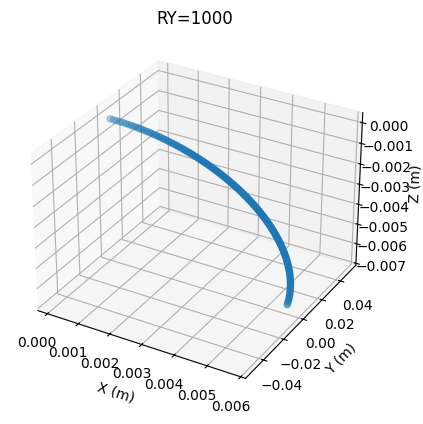

In [112]:
import sys
sys.path.append('..')

from src.deploy.utils.standardlizations import pika_to_piper, piper_to_pika, deg_to_rad, deg001_to_deg, rad_to_deg, deg_to_deg001
from src.deploy.utils.translations import (
    delta_to_absolute_gripper_translation, 
    delta_to_absolute_gripper_translation_align_piper,
)


def visualize_states(states_list, title='States Visualization'):
    """
    Visualize the states in a 3D plot.
    Params:
    - states_list: List of states, each state is [x, y, z, rx, ry, rz, grip]
    """
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    xs = states_list[:, 0] * 1e-6  # Convert to meters
    ys = states_list[:, 1] * 1e-6  # Convert to meters
    zs = states_list[:, 2] * 1e-6  # Convert to meters
    
    ax.scatter(xs, ys, zs)
    
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Z (m)')
    ax.set_title(title)

    # plt.gca().invert_yaxis()
    
    plt.show()


state = [0, 0, 0, 0, 90000, 0, 60000]
action = [100, 0, 0, 0, 1000, 0, 60000]
states_list = []

for _ in range(100):
    state = delta_to_absolute_gripper_translation_align_piper(state, action)
    states_list.append(state.copy())

states_list = np.array(states_list)

visualize_states(states_list, title='RY=1000')

In [7]:
state = np.array([0, 0, 0, 0, 90000, 0, 60000])
action = np.array([100, 0, 0, 0, 0, 1000, 60000])
states_list = []

for _ in range(100):
    state = delta_to_absolute_gripper_translation_align_piper(state, action)
    states_list.append(state.copy())

states_list = np.array(states_list)
visualize_states(states_list, title='RZ=1000')

[0 0 0] [ 0. -0.  0.] [100   0   0] [0.         0.         0.01745329]
[100   0   0] [-1.06865168e-18  9.32598196e-21  1.74532925e-02] [100   0   0] [0.         0.         0.01745329]
[199   1   0] [-2.13697785e-18  3.73010871e-20  3.49065850e-02] [100   0   0] [0.         0.         0.01745329]
[298   4   0] [-3.20358582e-18  8.38608714e-20  5.23424243e-02] [100   0   0] [0.         0.         0.01745329]
[397   9   0] [-4.27028601e-18  1.49084363e-19  6.97957168e-02] [100   0   0] [0.         0.         0.01745329]
[496  15   0] [-5.33568543e-18  2.32914406e-19  8.72490093e-02] [100   0   0] [0.         0.         0.01745329]
[595  23   0] [-6.39945955e-18  3.35325464e-19  1.04702302e-01] [100   0   0] [0.         0.         0.01745329]
[694  33   0] [-7.46128432e-18  4.56286343e-19  1.22155594e-01] [100   0   0] [0.         0.         0.01745329]
[793  45   0] [-8.52083632e-18  5.95760197e-19  1.39608887e-01] [100   0   0] [0.         0.         0.01745329]
[892  58   0] [-9.5777927

In [9]:
state = np.array([0, 0, 0, 0, 90000, 0, 60000])
action = np.array([0, 100, 0, 1000, 0, 0, 60000])
states_list = []

for _ in range(100):
    state = delta_to_absolute_gripper_translation_align_piper(state, action)
    states_list.append(state.copy())

states_list = np.array(states_list)
visualize_states(states_list, title='RX=1000')

[0 0 0] [ 0. -0.  0.] [  0 100   0] [0.01745329 0.         0.        ]
[  0 100   0] [ 1.74532925e-02 -3.04601955e-07 -2.65822099e-09] [  0 100   0] [0.01745329 0.         0.        ]
[  0 199   1] [ 3.49065850e-02 -6.09111125e-07 -1.06320742e-08] [  0 100   0] [0.01745329 0.         0.        ]
[  0 298   4] [ 5.23598776e-02 -9.13434754e-07 -2.39191308e-08] [  0 100   0] [0.01745329 0.         0.        ]
[  0 397   9] [ 6.98131701e-02 -1.21748014e-06 -4.25153434e-08] [  0 100   0] [0.01745329 0.         0.        ]
[  0 496  15] [ 8.72664626e-02 -1.52115467e-06 -6.64150473e-08] [  0 100   0] [0.01745329 0.         0.        ]
[  0 595  23] [ 1.04719755e-01 -1.82436585e-06 -9.56109626e-08] [  0 100   0] [0.01745329 0.         0.        ]
[  0 694  33] [ 1.22173048e-01 -2.12702130e-06 -1.30094196e-07] [  0 100   0] [0.01745329 0.         0.        ]
[  0 793  45] [ 1.39626340e-01 -2.42902884e-06 -1.69854243e-07] [  0 100   0] [0.01745329 0.         0.        ]
[  0 892  58] [ 1.5707963

In [40]:
import math
import numpy as np


def deg_to_rad(deg):
    """Convert degrees to radians"""
    return deg * (math.pi / 180)


def rad_to_deg(rad):
    """Convert radians to degrees"""
    return rad * (180 / math.pi)


def deg001_to_deg(deg001):
    """Convert 0.001 degrees to degrees"""
    return deg001 / 1000


def deg_to_deg001(deg):
    """Convert degrees to 0.001 degrees"""
    return deg * 1000


def euler_to_rotation_matrix(rx, ry, rz):
    """Convert Euler angles (in radians) to rotation matrix (XYZ order)"""
    # XYZ order: first rx (roll), then ry (pitch), then rz (yaw)
    cx, sx = math.cos(rx), math.sin(rx)
    cy, sy = math.cos(ry), math.sin(ry)
    cz, sz = math.cos(rz), math.sin(rz)
    
    # Rotation matrix for XYZ order
    R = np.array([
        [cy*cz, sx*sy*cz - cx*sz, cx*sy*cz + sx*sz],
        [cy*sz, sx*sy*sz + cx*cz, cx*sy*sz - sx*cz],
        [-sy,   sx*cy,            cx*cy]
    ])
    return R


def rotation_matrix_to_euler(R):
    """Convert rotation matrix to Euler angles (XYZ order)"""
    sy = math.sqrt(R[0, 0]**2 + R[1, 0]**2)
    singular = sy < 1e-6
    
    if not singular:
        rx = math.atan2(R[2, 1], R[2, 2])
        ry = math.atan2(-R[2, 0], sy)
        rz = math.atan2(R[1, 0], R[0, 0])
    else:
        rx = math.atan2(-R[1, 2], R[1, 1])
        ry = math.atan2(-R[2, 0], sy)
        rz = 0
    
    return np.array([rx, ry, rz])


def delta_to_absolute_gripper_translation(state_pos, state_rot, delta_pos, delta_rot):
    """
    Transform delta to absolute gripper translation,
    delta is in gripper frame and state is in world frame.
    
    Params:
    - delta: [x, y, z, rx, ry, rz] in gripper frame (x=forward, z=up)
             rx, ry, rz in 1 radian increments
    - state: [x, y, z, rx, ry, rz] in world frame (x=forward, z=up)
             rx, ry, rz in 1 radian increments
    Returns:
    - Absolute position and orientation in world frame [x, y, z, rx, ry, rz]
    """
    state_rot_matrix = euler_to_rotation_matrix(*state_rot)
    delta_rot_matrix = euler_to_rotation_matrix(*delta_rot)
    absolute_rot_matrix = state_rot_matrix @ delta_rot_matrix
    absolute_rot = rotation_matrix_to_euler(absolute_rot_matrix)

    absolute_pos = state_pos + state_rot_matrix.T @ delta_pos
    return absolute_pos, absolute_rot


def delta_to_absolute_gripper_translation_align_piper(state, delta):
    """
    For piper, the gripper should be rotated 90 degrees around the Y axis.
    """
    state = np.array(state)
    delta = np.array(delta)

    state_pos, state_rot = state[:3], state[3:6]
    state_rot = deg001_to_deg(state_rot)
    state_rot = deg_to_rad(state_rot)
    state_rot_matrix = euler_to_rotation_matrix(*state_rot)

    base_rot_delta = np.array([0, -np.pi/2, 0])  # 90 degrees around Y axis
    base_rot_delta_matrix = euler_to_rotation_matrix(*base_rot_delta)
    state_rot_matrix_aligned = state_rot_matrix @ base_rot_delta_matrix
    state_rot_aligned = rotation_matrix_to_euler(state_rot_matrix_aligned)

    delta_pos, delta_rot = delta[:3], delta[3:6]
    delta_rot = deg001_to_deg(delta_rot)
    delta_rot = deg_to_rad(delta_rot)

    new_state_pos, new_state_rot = delta_to_absolute_gripper_translation(state_pos, state_rot_aligned, delta_pos, delta_rot)
    new_state_rot_matrix = euler_to_rotation_matrix(*new_state_rot)
    base_rot_delta_inv = np.array([0, np.pi/2, 0])  # Inverse rotation
    base_rot_delta_inv_matrix = euler_to_rotation_matrix(*base_rot_delta_inv)
    new_state_rot_matrix_aligned = new_state_rot_matrix @ base_rot_delta_inv_matrix
    new_state_rot = rotation_matrix_to_euler(new_state_rot_matrix_aligned)

    new_state_rot = rad_to_deg(new_state_rot)
    new_state_rot = deg_to_deg001(new_state_rot)
    return np.concatenate([new_state_pos, new_state_rot, [delta[6]]]).astype(np.int64)

In [38]:
state_pos = np.array([0, 0, 0])
state_rot = np.array([0, np.pi / 2, np.pi / 2])
delta_pos = np.array([0.1, 0, 0])
delta_rot = np.array([0, -np.pi / 2, 0])
delta_to_absolute_gripper_translation(state_pos, state_rot, delta_pos, delta_rot)

(array([ 3.74939946e-34, -1.00000000e-01,  6.12323400e-18]),
 array([ 0.        , -0.        ,  1.57079633]))

虚拟：X顺时针，Y顺时针，Z顺时针

(301, 7) (301, 7)


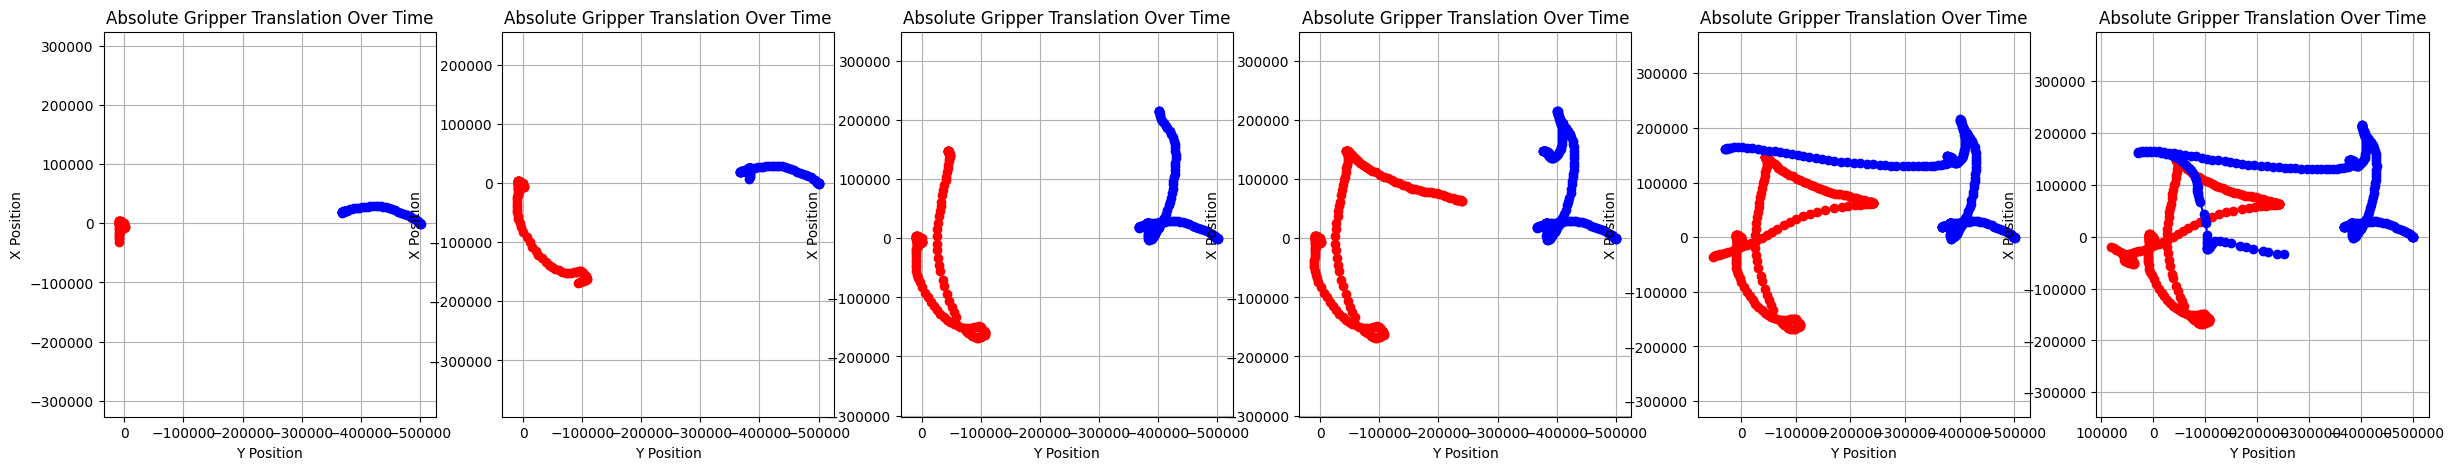

In [60]:
import math
import numpy as np
import matplotlib.pyplot as plt

left_state = [0,        0, 0, 0, 60000, 150000, 60000]
right_state = [0, -500000, 0, 0, 60000, 90000, 60000]
left_states_list = [left_state.copy()]
right_states_list = [right_state.copy()]

# left_state_pos, left_state_rot = np.array([0, 0, 0]), np.array([0, -0.1 * np.pi, 0.8 * np.pi])
# right_state_pos, right_state_rot = np.array([0, -0.5, 0]), np.array([0, -0.2 * np.pi, 0.5 * np.pi])
# left_states_list = [left_state_pos.copy()]
# right_states_list = [right_state_pos.copy()]

for action in delta_actions_list[:300]:
    action = action.copy()
    left_state_pos_delta, left_state_rot_delta = action[:3], action[3:6]
    right_state_pos_delta, right_state_rot_delta = action[7:10], action[10:13]
    left_action = pika_to_piper(action[:7])
    right_action = pika_to_piper(action[7:])
    left_state = delta_to_absolute_gripper_translation_align_piper(left_state, left_action)
    right_state = delta_to_absolute_gripper_translation_align_piper(right_state, right_action)
    left_states_list.append(left_state.copy())
    right_states_list.append(right_state.copy())

left_states_list = np.array(left_states_list)
right_states_list = np.array(right_states_list)

print(left_states_list.shape, right_states_list.shape)

plt.close()
plt.figure(figsize=(30, 5))

# 2d x y
plt.subplot(1, 6, 1)
plt.plot(left_states_list[:50, 1], left_states_list[:50, 0], marker='o', linestyle='-', color='r')
plt.plot(right_states_list[:50, 1], right_states_list[:50, 0], marker='o', linestyle='-', color='b')
plt.title('Absolute Gripper Translation Over Time')
plt.xlabel('Y Position')
plt.ylabel('X Position')
plt.axis('equal')
plt.gca().invert_xaxis()
plt.grid()

plt.subplot(1, 6, 2)
plt.plot(left_states_list[:100, 1], left_states_list[:100, 0], marker='o', linestyle='-', color='r')
plt.plot(right_states_list[:100, 1], right_states_list[:100, 0], marker='o', linestyle='-', color='b')
plt.title('Absolute Gripper Translation Over Time')
plt.xlabel('Y Position')
plt.ylabel('X Position')
plt.axis('equal')
plt.gca().invert_xaxis()
plt.grid()

plt.subplot(1, 6, 3)
plt.plot(left_states_list[:150, 1], left_states_list[:150, 0], marker='o', linestyle='-', color='r')
plt.plot(right_states_list[:150, 1], right_states_list[:150, 0], marker='o', linestyle='-', color='b')
plt.title('Absolute Gripper Translation Over Time')
plt.xlabel('Y Position')
plt.ylabel('X Position')
plt.axis('equal')
plt.gca().invert_xaxis()
plt.grid()

plt.subplot(1, 6, 4)
plt.plot(left_states_list[:200, 1], left_states_list[:200, 0], marker='o', linestyle='-', color='r')
plt.plot(right_states_list[:200, 1], right_states_list[:200, 0], marker='o', linestyle='-', color='b')
plt.title('Absolute Gripper Translation Over Time')
plt.xlabel('Y Position')
plt.ylabel('X Position')
plt.axis('equal')
plt.gca().invert_xaxis()
plt.grid()

plt.subplot(1, 6, 5)
plt.plot(left_states_list[:250, 1], left_states_list[:250, 0], marker='o', linestyle='-', color='r')
plt.plot(right_states_list[:250, 1], right_states_list[:250, 0], marker='o', linestyle='-', color='b')
plt.title('Absolute Gripper Translation Over Time')
plt.xlabel('Y Position')
plt.ylabel('X Position')
plt.axis('equal')
plt.gca().invert_xaxis()
plt.grid()

plt.subplot(1, 6, 6)
plt.plot(left_states_list[:300, 1], left_states_list[:300, 0], marker='o', linestyle='-', color='r')
plt.plot(right_states_list[:300, 1], right_states_list[:300, 0], marker='o', linestyle='-', color='b')
plt.title('Absolute Gripper Translation Over Time')
plt.xlabel('Y Position')
plt.ylabel('X Position')
plt.axis('equal')
plt.gca().invert_xaxis()
plt.grid()

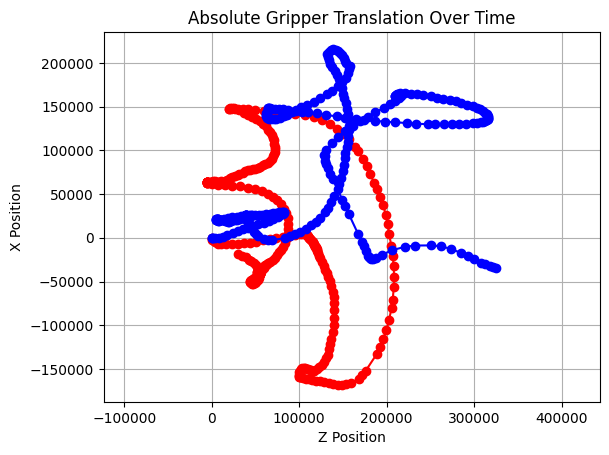

In [61]:
plt.plot(left_states_list[:, 2], left_states_list[:, 0], marker='o', linestyle='-', color='r')
plt.plot(right_states_list[:, 2], right_states_list[:, 0], marker='o', linestyle='-', color='b')
plt.title('Absolute Gripper Translation Over Time')
plt.xlabel('Z Position')
plt.ylabel('X Position')
plt.axis('equal')
plt.grid()
plt.show()

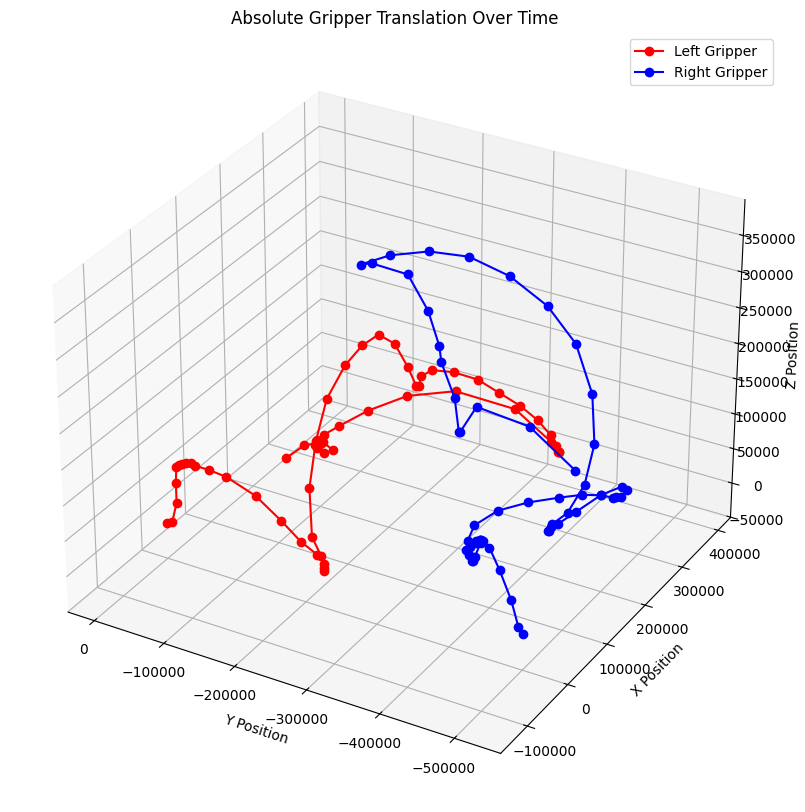

In [76]:
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot3D(left_states_list[:, 1], left_states_list[:, 0], left_states_list[:, 2], marker='o', linestyle='-', color='r', label='Left Gripper')
ax.plot3D(right_states_list[:, 1], right_states_list[:, 0], right_states_list[:, 2], marker='o', linestyle='-', color='b', label='Right Gripper')
ax.set_title('Absolute Gripper Translation Over Time')
ax.set_xlabel('Y Position')
ax.set_ylabel('X Position')
ax.set_zlabel('Z Position')
ax.legend()
plt.axis('equal')
plt.gca().invert_xaxis()
plt.grid()
plt.show()

In [58]:
plt.plot(np.arange(len(left_states)), [state[0] for state in left_states], label='Left Wrist X', c='r')
plt.plot(np.arange(len(left_states)), [state[1] for state in left_states], label='Left Wrist Y', c='g')
plt.plot(np.arange(len(left_states)), [state[2] for state in left_states], label='Left Wrist Z', c='b')
plt.plot(np.arange(len(left_positions)), [action[0] for action in left_positions], label='Left Wrist Action X', c='r', linestyle='--')
plt.plot(np.arange(len(left_positions)), [action[1] for action in left_positions], label='Left Wrist Action Y', c='g', linestyle='--')
plt.plot(np.arange(len(left_positions)), [action[2] for action in left_positions], label='Left Wrist Action Z', c='b', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Position')
plt.title('Wrist Positions Over Time')
plt.legend()
plt.show()

In [59]:
plt.plot(np.arange(len(left_states)), [state[0] for state in right_states], label='Left Wrist X', c='r')
plt.plot(np.arange(len(left_states)), [state[1] for state in right_states], label='Left Wrist Y', c='g')
plt.plot(np.arange(len(left_states)), [state[2] for state in right_states], label='Left Wrist Z', c='b')
plt.plot(np.arange(len(left_positions)), [action[0] for action in right_positions], label='Left Wrist Action X', c='r', linestyle='--')
plt.plot(np.arange(len(left_positions)), [action[1] for action in right_positions], label='Left Wrist Action Y', c='g', linestyle='--')
plt.plot(np.arange(len(left_positions)), [action[2] for action in right_positions], label='Left Wrist Action Z', c='b', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Position')
plt.title('Wrist Positions Over Time')
plt.legend()
plt.show()

In [44]:
import numpy as np
import pandas as pd

df = pd.read_csv('poses.csv')
df = df.iloc[::5].reset_index(drop=True)
df = df.loc[1:].reset_index(drop=True) - df.loc[:len(df) - 2].reset_index(drop=True)
df['grip'] = 1.5
x = np.array(df)
x = np.concatenate([x, x], axis=-1)
np.save('../examples/example_actions.npy', x)